In [1]:
# import_notebooks is a custom python script
# this line makes it possible to import functions from other IPython notebooks
from import_notebooks import *

In [2]:
# Here we import all the functions (*) from these notebooks
from Hainan_Data_Cleaning import *
from time_shift_dataframe import *
from Stratified_Split import *
from Cumulative import *
from Rollingsum import *
from LR_model import *
from Classification_Functions import *
# from nn_model_keras import *

from Utilities import *

importing Jupyter notebook from Hainan_Data_Cleaning.ipynb
importing Jupyter notebook from time_shift_dataframe.ipynb
importing Jupyter notebook from Stratified_Split.ipynb
importing Jupyter notebook from Cumulative.ipynb
importing Jupyter notebook from Rollingsum.ipynb
importing Jupyter notebook from LR_model.ipynb


C:\Users\Rohan\.conda\envs\Data-X\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


importing Jupyter notebook from Classification_Functions.ipynb
importing Jupyter notebook from Utilities.ipynb


In [3]:
from sklearn import tree

In [16]:
# load_hainan_data() is from Hainan_Data_Cleaning and it loads hainan data
df = load_hainan_data()
shift= 29
df_ts = timeshift_df(df, shift)

df_ts.columns.values
df_ts_relfeatures = df_ts.drop(['Year', 'Month', 'Day','BioCNG', 'LiquidFertilizer',
       'SolidFertilizer', 'WasteWater', 'SolidResidues','ProjectElectricity',
       'OfficeElectricity', 'Water', 'Diesel'], axis=1)

print(df_ts_relfeatures.shape[0])
df_ts_relfeatures = df_ts_relfeatures.apply(pd.to_numeric, errors='coerce')
df_ts_relfeatures = df_ts_relfeatures.dropna()
print(df_ts_relfeatures.shape[0])

roll = 40
roll_df = rollingsum(df_ts_relfeatures, roll)
print(roll_df.shape[0])
df_ts_relfeatures.head()

1399
1399
1359


,RawBiogas,PigManure,Cassava,FishWastewater,KitchenFoodWaste,MunicipalFecalWaste,TeaWaste,ChickenWaste,Bagasse,AlcoholWaste,ChineseMedicineWaste,EnergyGrass,BananaFruitShafts,LemonWaste,Percolate,Other,NaOH,FeCl2,PAM,Defoamer
0,5820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7027.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7687.0,14.9,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# FEATURE ENGINEERING GOES HERE

# roll_df.head()

pigsum = sum(roll_df.PigManure)
print("Pig Manure Sum:", pigsum)
cassavasum = sum(roll_df.Cassava)
print("Cassava Sum:", cassavasum)
fishsum = sum(roll_df.FishWastewater)
print("Fish Wastewater Sum:", fishsum)
kitchensum = sum(roll_df.KitchenFoodWaste)
print("Kitchen Food Waste Sum:", kitchensum)
mfwsum = sum(roll_df.MunicipalFecalWaste)
print("Municipal Fecal Waste Sum:", mfwsum)
teasum = sum(roll_df.TeaWaste)
print("Tea Waste Sum:", teasum)
chickensum = sum(roll_df.ChickenWaste)
print("Chicken Waste Sum:", chickensum)
bagsum = sum(roll_df.Bagasse)
print("Bagasse Sum:", bagsum)
alcsum = sum(roll_df.AlcoholWaste)
print("Alcohol Waste Sum:", alcsum)
cmwsum = sum(roll_df.ChineseMedicineWaste)
print("Chinese Medicine Waste Sum:", cmwsum)
grasssum = sum(roll_df.EnergyGrass)
print("Energy Grass Sum:", grasssum)
bfssum = sum(roll_df.BananaFruitShafts)
print("Banana Fruit Shafts Sum:", bfssum)
lwsum = sum(roll_df.LemonWaste)
print("Lemon Waste Sum:", lwsum)
percsum = sum(roll_df.Percolate)
print("Percolate Sum:", percsum)
othersum = sum(roll_df.Other)
print("Other Sum:", othersum)
naohsum = sum(roll_df.NaOH)
print("NaOH Sum:", naohsum)
fecl2sum = sum(roll_df.FeCl2)
print("FeCl2 Sum:", fecl2sum)
pamsum = sum(roll_df.PAM)
print("PAM Sum:", pamsum)
defoamersum = sum(roll_df.Defoamer)
print("Defoamer Sum:", defoamersum)

Pig Manure Sum: 936045.5500000016
Cassava Sum: 502930.3999999996
Fish Wastewater Sum: 112602.13999999975
Kitchen Food Waste Sum: 716414.5800000008
Municipal Fecal Waste Sum: 1332865.7200000004
Tea Waste Sum: 43285.279999999904
Chicken Waste Sum: 285335.83999999985
Bagasse Sum: 670575.2999999957
Alcohol Waste Sum: 36714.400000000045
Chinese Medicine Waste Sum: 11691.600000000008
Energy Grass Sum: 3726.3999999999924
Banana Fruit Shafts Sum: 26808.000000000007
Lemon Waste Sum: 15676.939999999991
Percolate Sum: 4116120.0000000075
Other Sum: 150124.5799999996
NaOH Sum: 7435332.253999993
FeCl2 Sum: 939600.0
PAM Sum: 84000.0
Defoamer Sum: 860.0


In [18]:
pigmax = max(roll_df.PigManure)
print("Pig Manure Max:", pigmax)
cassavamax = max(roll_df.Cassava)
print("Cassava max:", cassavamax)
fishmax = max(roll_df.FishWastewater)
print("Fish Wastewater max:", fishmax)
kitchenmax = max(roll_df.KitchenFoodWaste)
print("Kitchen Food Waste max:", kitchenmax)
mfwmax = max(roll_df.MunicipalFecalWaste)
print("Municipal Fecal Waste max:", mfwmax)
teamax = max(roll_df.TeaWaste)
print("Tea Waste max:", teamax)
chickenmax = max(roll_df.ChickenWaste)
print("Chicken Waste max:", chickenmax)
bagmax = max(roll_df.Bagasse)
print("Bagasse max:", bagmax)
alcmax = max(roll_df.AlcoholWaste)
print("Alcohol Waste max:", alcmax)
cmwmax = max(roll_df.ChineseMedicineWaste)
print("Chinese Medicine Waste max:", cmwmax)
grassmax = max(roll_df.EnergyGrass)
print("Energy Grass max:", grassmax)
bfsmax = max(roll_df.BananaFruitShafts)
print("Banana Fruit Shafts max:", bfsmax)
lwmax = max(roll_df.LemonWaste)
print("Lemon Waste max:", lwmax)
percmax = max(roll_df.Percolate)
print("Percolate max:", percmax)
othermax = max(roll_df.Other)
print("Other max:", othermax)
naohmax = max(roll_df.NaOH)
print("NaOH max:", naohmax)
fecl2max = max(roll_df.FeCl2)
print("FeCl2 max:", fecl2max)
pammax = max(roll_df.PAM)
print("PAM max:", pammax)
defoamermax = max(roll_df.Defoamer)
print("Defoamer max:", defoamermax)

Pig Manure Max: 7069.96
Cassava max: 3455.3099999999995
Fish Wastewater max: 362.58000000000004
Kitchen Food Waste max: 3638.6800000000007
Municipal Fecal Waste max: 6808.09
Tea Waste max: 235.87999999999997
Chicken Waste max: 1653.55
Bagasse max: 1781.23
Alcohol Waste max: 335.64
Chinese Medicine Waste max: 136.58
Energy Grass max: 45.4
Banana Fruit Shafts max: 582.88
Lemon Waste max: 208.29999999999995
Percolate max: 16454.0
Other max: 1245.84
NaOH max: 42485.6
FeCl2 max: 6500.0
PAM max: 550.0
Defoamer max: 14.5


In [19]:
roll_df['Sum1'] = roll_df.ChineseMedicineWaste + roll_df.AlcoholWaste + roll_df.EnergyGrass + roll_df.BananaFruitShafts + roll_df.LemonWaste
roll_df['Sum2'] = roll_df.FishWastewater + roll_df.TeaWaste + roll_df.ChickenWaste
roll_df['Sum3'] = roll_df.PAM + roll_df.Defoamer + roll_df.Other

roll_df.head()

,RawBiogas,PigManure,Cassava,FishWastewater,KitchenFoodWaste,MunicipalFecalWaste,TeaWaste,ChickenWaste,Bagasse,AlcoholWaste,...,LemonWaste,Percolate,Other,NaOH,FeCl2,PAM,Defoamer,Sum1,Sum2,Sum3
0,132440.0,7058.59,0.0,0.0,0.0,0.0,0.0,0.0,330.07,0.0,...,0.0,0.0,267.78,5184.8,0.0,0.0,0.0,0.0,0.0,267.78
1,128360.0,7062.44,0.0,0.0,0.0,0.0,0.0,0.0,334.57,0.0,...,0.0,0.0,267.78,5184.8,0.0,0.0,0.0,0.0,0.0,267.78
2,121333.0,7069.96,0.0,0.0,0.0,0.0,0.0,0.0,339.57,0.0,...,0.0,0.0,267.78,5184.8,0.0,0.0,0.0,0.0,0.0,267.78
3,114659.0,7069.96,0.0,0.0,0.0,0.0,0.0,0.0,357.07,0.0,...,0.0,0.0,267.78,5184.8,0.0,0.0,0.0,0.0,0.0,267.78
4,106972.0,7061.28,0.0,0.0,0.0,0.0,0.0,0.0,364.07,0.0,...,0.0,0.0,267.78,5184.8,0.0,0.0,0.0,0.0,0.0,267.78


In [20]:
df_final = roll_df.drop(['ChineseMedicineWaste', 'AlcoholWaste', 'EnergyGrass','BananaFruitShafts', 'LemonWaste',
       'FishWastewater', 'TeaWaste', 'ChickenWaste','PAM',
       'Defoamer', 'Other'], axis=1)

In [21]:
df_final.head()

,RawBiogas,PigManure,Cassava,KitchenFoodWaste,MunicipalFecalWaste,Bagasse,Percolate,NaOH,FeCl2,Sum1,Sum2,Sum3
0,132440.0,7058.59,0.0,0.0,0.0,330.07,0.0,5184.8,0.0,0.0,0.0,267.78
1,128360.0,7062.44,0.0,0.0,0.0,334.57,0.0,5184.8,0.0,0.0,0.0,267.78
2,121333.0,7069.96,0.0,0.0,0.0,339.57,0.0,5184.8,0.0,0.0,0.0,267.78
3,114659.0,7069.96,0.0,0.0,0.0,357.07,0.0,5184.8,0.0,0.0,0.0,267.78
4,106972.0,7061.28,0.0,0.0,0.0,364.07,0.0,5184.8,0.0,0.0,0.0,267.78


In [22]:
x_train_r, y_train_r, x_test_r, y_test_r = test_train_for_regression(df_final)
x_train_c, y_train_c, x_test_c, y_test_c, bins_c = test_train_for_classification(df_final, num_buckets = 7)
x_train_c_1, y_train_c_1, x_test_c_1, y_test_c_1, bins_c_1 = test_train_for_classification(df_final, \
                                output_var="RawBiogas", \
                                num_buckets = 7, one_hot=True)

print(x_train_r.shape,  y_train_r.shape, x_test_r.shape, y_test_r.shape)
# print(x_train_r.columns.values)

(1087, 11) (1087,) (272, 11) (272,)


In [23]:
# np.savetxt("x_train_c_RK.csv", x_train_c, delimiter=",")
# np.savetxt("y_train_c_RK.csv", y_train_c, delimiter=",")
# np.savetxt("x_test_c_RK.csv", x_test_c, delimiter=",")
# np.savetxt("y_test_c_RK.csv", y_test_c, delimiter=",")
np.savetxt("x_train_r_biogas_RK.csv", x_train_r, delimiter=",")
np.savetxt("y_train_r_biogas_RK.csv", y_train_r, delimiter=",")
np.savetxt("x_test_r_biogas_RK.csv", x_test_r, delimiter=",")
np.savetxt("y_test_r_biogas_RK.csv", y_test_r, delimiter=",")

In [11]:
flat_bins = bins_c/roll
print(flat_bins)
bin1 = (flat_bins[0] + flat_bins[1])/2
bin2 = (flat_bins[1] + flat_bins[2])/2
bin3 = (flat_bins[2] + flat_bins[3])/2
bin4 = (flat_bins[3] + flat_bins[4])/2
bin5 = (flat_bins[4] + flat_bins[5])/2
bin6 = (flat_bins[5] + flat_bins[6])/2
bin7 = (flat_bins[6] + flat_bins[7])/2

[  2102.1025641    3609.7032967    4837.65934066   6468.55311355
   8871.42857143  12888.69230769  16982.69230769  20568.76923077]


In [12]:
print(bin1)
print(bin2)
print(bin3)
print(bin4)
print(bin5)
print(bin6)
print(bin7)

2855.9029304
4223.68131868
5653.10622711
7669.99084249
10880.0604396
14935.6923077
18775.7307692


In [13]:
# Linear Regression
lr = run_lm(x_train_r, y_train_r, x_test_r, y_test_r)

Starting linear regression model.
                            OLS Regression Results                            
Dep. Variable:              RawBiogas   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1108.
Date:                Sat, 28 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:19:21   Log-Likelihood:                -13659.
No. Observations:                1099   AIC:                         2.734e+04
Df Residuals:                    1087   BIC:                         2.740e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------


In [16]:
# df_final2 = df_final.drop(['Sum2', 'Sum3'], axis=1)

# x_train_r2, y_train_r2, x_test_r2, y_test_r2 = test_train_for_regression(df_final2)
# # Linear Regression 2
# lr2 = run_lm(x_train_r2, y_train_r2, x_test_r2, y_test_r2)

In [17]:
# rr = run_ridge(x_train_r, y_train_r, x_test_r, y_test_r, alpha = 0.5)

# x_train_c, y_train_c, x_test_c, y_test_c = test_train_for_classification(df_final, num_buckets = 7)


In [14]:
# Classification
lm = LogisticModel(x_train_c, y_train_c, x_test_c, y_test_c)

dt = DecisionTree(x_train_c, y_train_c, x_test_c, y_test_c)

rf = RandomForest(x_train_c, y_train_c, x_test_c, y_test_c)

nb = NaiveBayes(x_train_c, y_train_c, x_test_c, y_test_c)


In [15]:
dtree = dt[0]

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [19]:
output_var = "RawBiogas"
x_final = df_final.drop([output_var], axis=1)
y_final = df_final[output_var]/roll

rf_predictions = rf[0].predict(x_final)

#bin means
2855.9029304
4223.68131868
5653.10622711
7669.99084249
10880.0604396
14935.6923077
18775.7307692

18775.7307692

In [20]:
for i in np.arange(0, len(rf_predictions)):
    if rf_predictions[i] == 0:
        rf_predictions[i] = 2855.9
    elif rf_predictions[i] == 1:
        rf_predictions[i] = 4223.7
    elif rf_predictions[i] == 2:
        rf_predictions[i] = 5653.1
    elif rf_predictions[i] == 3:
        rf_predictions[i] = 7667.0
    elif rf_predictions[i] == 4:
        rf_predictions[i] = 10880.1
    elif rf_predictions[i] == 5:
        rf_predictions[i] = 14935.7
    elif rf_predictions[i] == 6:
        rf_predictions[i] = 18775.7



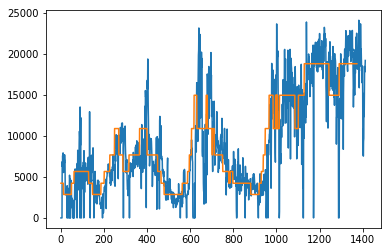

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_ts_relfeatures['RawBiogas'])
plt.plot(rf_predictions)

In [24]:
rf = RandomForest(x_train_c, y_train_c, x_test_c, y_test_c, min_samples_split=2, min_samples_leaf=1,
                                     max_depth=10, max_leaf_nodes=10, max_features=3)

In [25]:
best_score = 0
best_model = rf
#tune_dict = {"min_samples_split": 2, "min_samples_leaf": 1, "max_depth": 0, "max_leaf_nodes": 0, "max_features": 0}

In [16]:
best_score = 0
best_model = rf
for a in np.arange(2, 6):
    print("a =", a, "\n")
    for b in np.arange(1, 6):
        for c in np.arange(10, 21):
                for e in np.arange(3, 12):
                    # print("e =", e, "\n")
                    rf = RandomForest(x_train_c, y_train_c, x_test_c, y_test_c, min_samples_split=a, min_samples_leaf=b,
                                     max_depth=c, max_features=e, n_estimators = 10)
                    if rf[1] > best_score:
                        best_model = rf[0]
                        best_score = rf[1]
                        print(best_score)

a = 2 

0.942028985507
0.945652173913
0.952898550725
a = 3 

0.95652173913
0.960144927536
a = 4 

a = 5 



In [26]:
best_score = 0
best_model_dt = dt
for a in np.arange(2, 6):
    print("a =", a, "\n")
    for b in np.arange(1, 6):
        for c in np.arange(10, 21):
                for e in np.arange(3, 12):
                    # print("e =", e, "\n")
                    dt = DecisionTree(x_train_c, y_train_c, x_test_c, y_test_c, min_samples_split=a, min_samples_leaf=b,
                                     max_depth=c, max_features=e)
                    if dt[1] > best_score:
                        best_model_dt = dt[0]
                        best_score = dt[1]
                        print(best_score)

a = 2 

0.868613138686
0.897810218978
0.905109489051
0.908759124088
0.912408759124
0.941605839416
0.959854014599
a = 3 

0.963503649635
a = 4 

a = 5 



In [24]:
print(best_model_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0, presort=False, random_state=None,
            splitter='best')


In [19]:
print(best_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [27]:
print("Linear Regression - Mean Absolute Error ", "train:",lr[0], "test:",lr[1])
print("Linear Regression - Mean Absolute Error ", "train:",lr2[0], "test:",lr2[1])
print("Ridge Regression - Mean Absolute Error ", "train:",rr[0], "test:",rr[1])
print("Logistic Model - Accuracy:", lm[1])
print("Decision Tree - Accuracy:", dt[1])
print("Random Forest - Accuracy:", rf[1])
print("Naive Bayes - Accuracy:", nb[1])

Linear Regression - Mean Absolute Error  train: 49547.8079602 test: 48798.0169392
Linear Regression - Mean Absolute Error  train: 50534.1447957 test: 46072.9772456
Ridge Regression - Mean Absolute Error  train: 61934.5294936 test: 59616.665799
Logistic Model - Accuracy: 0.641304347826
Decision Tree - Accuracy: 0.945652173913
Random Forest - Accuracy: 0.942028985507
Naive Bayes - Accuracy: 0.557971014493


In [16]:
with open("biogas_classifier.txt", "w") as f:
    f = tree.export_graphviz(dt[0], out_file=f)

In [27]:
tree.export_graphviz(best_model_dt, out_file='tree.dot')

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(best_model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'